# Import libraries 

In [1]:
import keras
import win32gui
%matplotlib inline
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns
from tkinter import *
import matplotlib.pyplot as plt
from keras.datasets import mnist
from PIL import ImageGrab, Image
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Flatten

# Load MNIST Dataset

In [2]:
# MNIST data can be loaded from the keras library. 
(train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()

In [3]:
# check the shape of the dataset
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


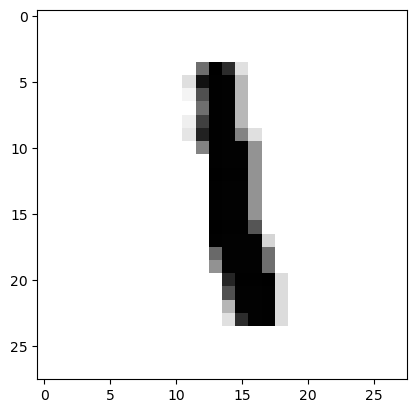

Label of image is 1


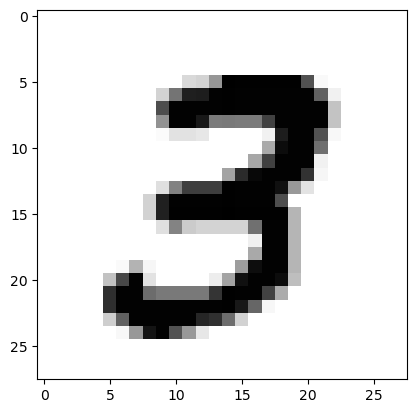

Label of image is 3


In [4]:
for i in range(6,8):
  pixels=train_samples[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", train_labels[i])

# Data preprocessing

In [5]:
#convert_dtype => float32
train_samples= train_samples.astype('float32')
test_samples= test_samples.astype('float32')


In [6]:
#Normalize the inputs
train_samples=(train_samples - np.min(train_samples))/np.ptp(train_samples) #ptp function is used to find the range
test_samples=(test_samples - np.min(test_samples))/np.ptp(test_samples)

In [7]:
#Check if train_samples is normalized or not
np.isclose(np.amax(train_samples), 1)

True

In [8]:
#Reshape train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras
train_samples = train_samples.reshape(train_samples.shape[0],train_samples.shape[1],train_samples.shape[2],1)
test_samples = test_samples.reshape(test_samples.shape[0],test_samples.shape[1],test_samples.shape[2],1)

In [9]:
def oneHot(y, Ny):
    
    import tensorflow 
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

# Convolutional Neural Network Model

In [10]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
earlystopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [13]:
results = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=30, batch_size=250,callbacks=[earlystopping])
print("The model has successfully trained")

Epoch 1/30
216/216 [==============================] - 135s 615ms/step - loss: 0.2609 - accuracy: 0.9236 - val_loss: 0.0676 - val_accuracy: 0.9810
Epoch 2/30
216/216 [==============================] - 122s 564ms/step - loss: 0.0684 - accuracy: 0.9794 - val_loss: 0.0531 - val_accuracy: 0.9850
Epoch 3/30
216/216 [==============================] - 155s 719ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0586 - val_accuracy: 0.9835
Epoch 4/30
216/216 [==============================] - 164s 759ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0478 - val_accuracy: 0.9865
Epoch 5/30
216/216 [==============================] - 159s 736ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0460 - val_accuracy: 0.9878
Epoch 6/30
216/216 [==============================] - 136s 628ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0520 - val_accuracy: 0.9873
Epoch 7/30
216/216 [==============================] - 160s 742ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0557 -

In [14]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

C:\Users\Esraa Alsaede\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving the model as mnist.h5


In [15]:
# predict Model
predicted_labels_train =  model.predict(train_samples)

1875/1875 [==============================] - 53s 28ms/step


In [16]:
def oneHot_tolabel(y):
    y_b=[]
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    y_b[:, 0] = labelencoder.fit_transform(y_b[:, 0])
    return y_b

In [17]:
def accuracy(x_train, y_train, model):
    loss,acc = model.evaluate(train_samples, train_labels,verbose=0) 
    return acc

acc = accuracy(train_samples, train_labels, model)
print('Train accuracy is, ', acc*100, '%')

Train accuracy is,  99.86000061035156 %


# Testing the data

In [18]:
def accuracy(x_test, y_test, model):
    
    loss,acc = model.evaluate(test_samples, test_labels,verbose=0) 
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Test accuracy is,  98.65999817848206 %


In [19]:
# Final evaluation of the model
scores = model.evaluate(test_samples, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.34%


# GUI

In [20]:
model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

1/1 [==============================] - 0s 23ms/step
